In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn as sk
%matplotlib inline


## Punto 3

In [22]:
#Definir la ruta del dataset, en este caso se asume que el archivo "heart_disease_uci.csv" se encuentra en la carpeta "input" dentro del directorio actual.
ruta = r"../input/heart_disease_uci.csv"
# Cargar el dataset
df = pd.read_csv(ruta)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [23]:
#Renombrar la columna 'num' a 'target' y convertirla a tipo categórico

df = df.rename(columns={
    "num": "target"
})

df['target'] = df['target'].astype('category')

df = df.drop(columns=['id'])

#tambien se puede usar como binario, donde 0 es ausencia de enfermedad y 1 es presencia de enfermedad

In [24]:
# ============================================
# 2. INSPECCIÓN INICIAL
# ============================================
print("\n=== INFORMACIÓN GENERAL ===")
print(df.info())


=== INFORMACIÓN GENERAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       920 non-null    int64   
 1   sex       920 non-null    object  
 2   dataset   920 non-null    object  
 3   cp        920 non-null    object  
 4   trestbps  861 non-null    float64 
 5   chol      890 non-null    float64 
 6   fbs       830 non-null    object  
 7   restecg   918 non-null    object  
 8   thalch    865 non-null    float64 
 9   exang     865 non-null    object  
 10  oldpeak   858 non-null    float64 
 11  slope     611 non-null    object  
 12  ca        309 non-null    float64 
 13  thal      434 non-null    object  
 14  target    920 non-null    category
dtypes: category(1), float64(5), int64(1), object(8)
memory usage: 101.9+ KB
None


In [25]:
print("\n=== ESTADÍSTICAS BÁSICAS ===")
print(df.describe())


=== ESTADÍSTICAS BÁSICAS ===
              age    trestbps        chol      thalch     oldpeak          ca
count  920.000000  861.000000  890.000000  865.000000  858.000000  309.000000
mean    53.510870  132.132404  199.130337  137.545665    0.878788    0.676375
std      9.424685   19.066070  110.780810   25.926276    1.091226    0.935653
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.000000  120.000000  175.000000  120.000000    0.000000    0.000000
50%     54.000000  130.000000  223.000000  140.000000    0.500000    0.000000
75%     60.000000  140.000000  268.000000  157.000000    1.500000    1.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000


In [26]:
#Valores faltantes por columna
print("\n=== VALORES FALTANTES POR COLUMNA ===")
print(df.isnull().sum())


=== VALORES FALTANTES POR COLUMNA ===
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64


In [27]:
missing = pd.DataFrame({
    "missing": df.isna().sum(),
    "percent": (df.isna().mean() * 100).round(2)
}).sort_values("missing", ascending=False)

print(missing)

          missing  percent
ca            611    66.41
thal          486    52.83
slope         309    33.59
fbs            90     9.78
oldpeak        62     6.74
trestbps       59     6.41
thalch         55     5.98
exang          55     5.98
chol           30     3.26
restecg         2     0.22
dataset         0     0.00
cp              0     0.00
age             0     0.00
sex             0     0.00
target          0     0.00


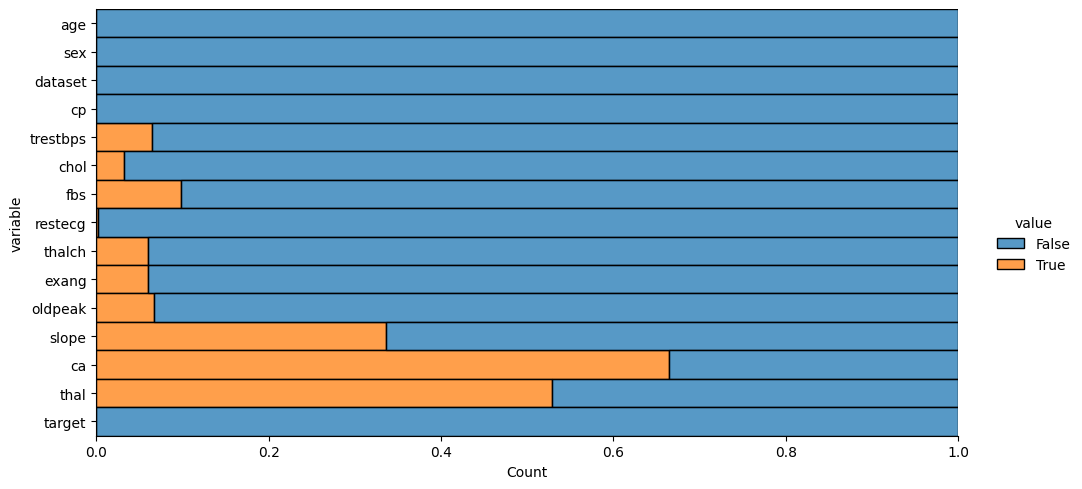

In [28]:
#En cuanto a la proporción de valores nulos por variable, se observa que la mayoría de las columnas no presentan valores faltantes, excepto por "ca" y "thal", que tienen un porcentaje de valores nulos del 0.82% y 0.55% respectivamente. Esto indica que el dataset está bastante completo, aunque se podrían considerar estrategias para manejar los valores faltantes en estas dos columnas si se decide utilizarlas en el análisis o modelado posterior.
(
    df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
)

<Axes: >

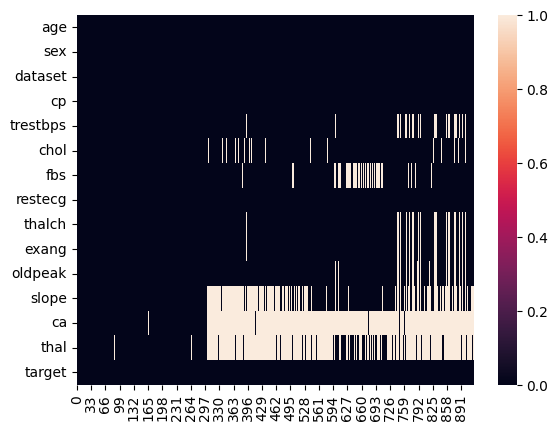

In [29]:
#visualizar los valores nulos con un mapa de calor
(
    df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df
            )
        )   
    )
)

In [30]:
# ============================================
# 3. CLASIFICACIÓN DE VARIABLES
# ============================================

target_col = "target"

variables_cualitativas = [
    "sex", "dataset", "cp", "fbs",
    "restecg", "exang", "slope",
    "thal"
]

nominales = ['dataset', 'sex', 'fbs', 'exang', 'restecg']
ordinales = ['cp', 'slope', 'thal']

variables_cuantitativas = [
    "age", "trestbps", "chol",
    "thalch", "oldpeak", "ca"
]

discretas = ['ca']
continuas = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

print("Variables cualitativas nominales:", nominales)
print("Variables cualitativas ordinales:", ordinales)
print("Variables cuantitativas discretas:", discretas)
print("Variables cuantitativas continuas:", continuas)

Variables cualitativas nominales: ['dataset', 'sex', 'fbs', 'exang', 'restecg']
Variables cualitativas ordinales: ['cp', 'slope', 'thal']
Variables cuantitativas discretas: ['ca']
Variables cuantitativas continuas: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']


In [31]:
#Imputacion simple por columna (mediana/moda) manteniendo columnas originales
df_imputed = df.copy()

features = df_imputed.drop(columns=[target_col])
num_cols = variables_cuantitativas
cat_cols = variables_cualitativas

# Asegurar que numericas sean tipo numerico ("?" -> NaN)
for col in num_cols:
    features[col] = pd.to_numeric(features[col], errors="coerce")

num_imputer = sklearn.impute.SimpleImputer(strategy="median")
cat_imputer = sklearn.impute.SimpleImputer(strategy="most_frequent")

features[num_cols] = num_imputer.fit_transform(features[num_cols])
features[cat_cols] = cat_imputer.fit_transform(features[cat_cols])

df_imputed_simple = features.copy()
df_imputed_simple[target_col] = df[target_col]

# Usar dataset imputado para el resto del analisis
df = df_imputed_simple

NameError: name 'sklearn' is not defined

In [ ]:
#Valores faltantes por columna despues de imputar
print("\n=== VALORES FALTANTES DESPUES DE IMPUTAR ===")
print(df.isnull().sum())


=== VALORES FALTANTES DESPUES DE IMPUTAR ===
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
#Vista rapida del dataset imputado
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63.0,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67.0,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67.0,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37.0,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41.0,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df[["sex", "dataset", "cp", "thal", "ca"]].head()

,sex,dataset,cp,thal,ca
0,Male,Cleveland,typical angina,fixed defect,0.0
1,Male,Cleveland,asymptomatic,normal,3.0
2,Male,Cleveland,asymptomatic,reversable defect,2.0
3,Male,Cleveland,non-anginal,normal,0.0
4,Female,Cleveland,atypical angina,normal,0.0


In [ ]:

summary = {}

for col in ["age", "trestbps", "chol", "thalch","ca","oldpeak"]:

    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()

    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)

    cv = std / mean

    summary[col] = {
        "Media": mean,
        "Mediana": median,
        "DesvStd": std,
        "IQR": iqr,
        "CV": cv
    }

summary_df = pd.DataFrame(summary).T

print("\n=== MEDIDAS DE RESUMEN ===")
print(summary_df)


=== MEDIDAS DE RESUMEN ===
               Media  Mediana     DesvStd    IQR        CV
age        53.510870     54.0    9.424685  13.00  0.176127
trestbps  131.995652    130.0   18.451300  20.00  0.139787
chol      199.908696    223.0  109.040171  89.25  0.545450
thalch    137.692391    140.0   25.145235  36.00  0.182619
ca          0.227174      0.0    0.628936   0.00  2.768524
oldpeak     0.853261      0.5    1.058049   1.50  1.240006


In [ ]:
df["target"] = df["target"].astype("int64")

df["target_bin"] = (df["target"] > 0).astype(int)

In [ ]:
df_age_tag = df.groupby("target_bin")["age"].agg(
    media="mean",
    std="std",
    Q1=lambda x: x.quantile(0.25),
    mediana="median",
    Q3=lambda x: x.quantile(0.75)
)

# Calcular IQR
df_age_tag["IQR"] = df_age_tag["Q3"] - df_age_tag["Q1"]

# Calcular Coeficiente de Variación (%)
df_age_tag["CV"] = (df_age_tag["std"] / df_age_tag["media"]) * 100

df_age_tag

,media,std,Q1,mediana,Q3,IQR,CV
target_bin,,,,,,,
0,50.547445,9.433700,43.0,51.0,57.0,14.0,18.66306
1,55.903733,8.718959,51.0,57.0,62.0,11.0,15.59638


In [ ]:
df_trestbps_tag = df.groupby("target_bin")["trestbps"].agg(
    media="mean",
    std="std",
    Q1=lambda x: x.quantile(0.25),
    mediana="median",
    Q3=lambda x: x.quantile(0.75)
)

# Calcular IQR
df_trestbps_tag["IQR"] = df_trestbps_tag["Q3"] - df_trestbps_tag["Q1"]

# Calcular Coeficiente de Variación (%)
df_trestbps_tag["CV"] = (df_trestbps_tag["std"] / df_trestbps_tag["media"]) * 100

df_trestbps_tag

,media,std,Q1,mediana,Q3,IQR,CV
target_bin,,,,,,,
0,129.917275,16.453274,120.0,130.0,140.0,20.0,12.664423
1,133.673870,19.776003,120.0,130.0,145.0,25.0,14.794217


In [ ]:
df_chol_tag = df.groupby("target_bin")["chol"].agg(
    media="mean",
    std="std",
    Q1=lambda x: x.quantile(0.25),
    mediana="median",
    Q3=lambda x: x.quantile(0.75)
)

# Calcular IQR
df_chol_tag["IQR"] = df_chol_tag["Q3"] - df_chol_tag["Q1"]

# Calcular Coeficiente de Variación (%)
df_chol_tag["CV"] = (df_chol_tag["std"] / df_chol_tag["media"]) * 100

df_chol_tag

,media,std,Q1,mediana,Q3,IQR,CV
target_bin,,,,,,,
0,227.678832,74.061998,201.0,225.0,266.0,65.0,32.529154
1,177.485265,126.311070,0.0,219.0,267.0,267.0,71.167074


In [ ]:
df_thalch_tag = df.groupby("target_bin")["thalch"].agg(
    media="mean",
    std="std",
    Q1=lambda x: x.quantile(0.25),
    mediana="median",
    Q3=lambda x: x.quantile(0.75)
)

# Calcular IQR
df_thalch_tag["IQR"] = df_thalch_tag["Q3"] - df_thalch_tag["Q1"]

# Calcular Coeficiente de Variación (%)
df_thalch_tag["CV"] = (df_thalch_tag["std"] / df_thalch_tag["media"]) * 100

df_thalch_tag

,media,std,Q1,mediana,Q3,IQR,CV
target_bin,,,,,,,
0,148.372263,23.103587,135.5,150.0,165.0,29.5,15.571365
1,129.068762,23.371722,113.0,130.0,144.0,31.0,18.107962


In [ ]:
df_ca_tag = df.groupby("target_bin")["ca"].agg(
    media="mean",
    std="std",
    Q1=lambda x: x.quantile(0.25),
    mediana="median",
    Q3=lambda x: x.quantile(0.75)
)

# Calcular IQR
df_ca_tag["IQR"] = df_ca_tag["Q3"] - df_ca_tag["Q1"]

# Calcular Coeficiente de Variación (%)
df_ca_tag["CV"] = (df_ca_tag["std"] / df_ca_tag["media"]) * 100

df_ca_tag

,media,std,Q1,mediana,Q3,IQR,CV
target_bin,,,,,,,
0,0.111922,0.427276,0.0,0.0,0.0,0.0,381.761873
1,0.320236,0.740825,0.0,0.0,0.0,0.0,231.337443


In [ ]:
df_oldpeak_tag = df.groupby("target_bin")["oldpeak"].agg(
    media="mean",
    std="std",
    Q1=lambda x: x.quantile(0.25),
    mediana="median",
    Q3=lambda x: x.quantile(0.75)
)

# Calcular IQR
df_oldpeak_tag["IQR"] = df_oldpeak_tag["Q3"] - df_oldpeak_tag["Q1"]

# Calcular Coeficiente de Variación (%)
df_oldpeak_tag["CV"] = (df_oldpeak_tag["std"] / df_oldpeak_tag["media"]) * 100

df_oldpeak_tag

,media,std,Q1,mediana,Q3,IQR,CV
target_bin,,,,,,,
0,0.422384,0.697302,0.0,0.0,0.6,0.6,165.08694
1,1.201179,1.166730,0.0,1.0,2.0,2.0,97.13207


In [ ]:
cat_vars = ['sex','dataset','cp','fbs','restecg','exang','slope','thal']

for col in cat_vars:
    print(f"\n=== {col.upper()} ===")
    print(pd.crosstab(df[col], df["target_bin"], normalize="index"))


=== SEX ===
target_bin         0         1
sex                           
Female      0.742268  0.257732
Male        0.367769  0.632231

=== DATASET ===
target_bin            0         1
dataset                          
Cleveland      0.542763  0.457237
Hungary        0.638225  0.361775
Switzerland    0.065041  0.934959
VA Long Beach  0.255000  0.745000

=== CP ===
target_bin              0         1
cp                                 
asymptomatic     0.209677  0.790323
atypical angina  0.862069  0.137931
non-anginal      0.642157  0.357843
typical angina   0.565217  0.434783

=== FBS ===
target_bin         0         1
fbs                           
False       0.469309  0.530691
True        0.318841  0.681159

=== RESTECG ===
target_bin               0         1
restecg                             
lv hypertrophy    0.436170  0.563830
normal            0.484629  0.515371
st-t abnormality  0.340782  0.659218

=== EXANG ===
target_bin         0         1
exang                        

## Punto 4

In [ ]:

# ============================================
# 6. MATRIZ DE CORRELACIÓN (PUNTO 4)
# ============================================

corr = df[variables_cuantitativas + ["target_bin"]].corr()

print("\n=== MATRIZ DE CORRELACIÓN ===")
print(corr)


# ============================================
# 7. HEATMAP DE CORRELACIÓN
# ============================================

plt.figure(figsize=(8,6))

plt.imshow(corr)

plt.colorbar()

plt.xticks(
    range(len(corr.columns)),
    corr.columns,
    rotation=90
)

plt.yticks(
    range(len(corr.columns)),
    corr.columns
)

plt.title("Mapa de Calor - Correlación")

plt.tight_layout()
plt.show()


# ==========================================================
# 8. CALCULO DE PROBABILIDADES CONDICIONALES
# Estudio de enfermedad cardíaca
# ==========================================================

# Recordatorio teórico
# P(A | B) = casos donde ocurre A y B / casos donde ocurre B
#
# En este análisis:
# A = target_bin == 1  -> paciente con enfermedad
# B = condición que queremos analizar


# ==========================================================
# 1. PROBABILIDAD DE ENFERMEDAD DADO QUE ES HOMBRE
# P(target = 1 | sex = Male)
# ==========================================================

# Pacientes que:
# - Son hombres
# - Tienen enfermedad
male_with_disease = df[
    (df["sex"] == "Male") &
    (df["target_bin"] == 1)
]

# Total de hombres en el dataset
total_males = df[
    df["sex"] == "Male"
]

# Probabilidad condicional
p_male = len(male_with_disease) / len(total_males)


# ==========================================================
# 2. PROBABILIDAD DE ENFERMEDAD CUANDO EL DOLOR NO ES ASINTOMÁTICO
# P(target = 1 | cp != asymptomatic)
# ==========================================================

# Pacientes con síntomas y con enfermedad
symptomatic_with_disease = df[
    (df["cp"] != "asymptomatic") &
    (df["target_bin"] == 1)
]

# Total de pacientes con síntomas
total_symptomatic = df[
    df["cp"] != "asymptomatic"
]

# Probabilidad condicional
p_cp = len(symptomatic_with_disease) / len(total_symptomatic)


# ==========================================================
# 3. PROBABILIDAD DE ENFERMEDAD SI EL PACIENTE ES ASINTOMÁTICO
# P(target = 1 | cp = asymptomatic)
# ==========================================================

# Pacientes asintomáticos con enfermedad
asymptomatic_with_disease = df[
    (df["cp"] == "asymptomatic") &
    (df["target_bin"] == 1)
]

# Total de pacientes asintomáticos
total_asymptomatic = df[
    df["cp"] == "asymptomatic"
]

# Probabilidad condicional
p_asym = len(asymptomatic_with_disease) / len(total_asymptomatic)


# ==========================================================
# 4. RESULTADOS
# ==========================================================

print("\n=========== RESULTADOS ===========")

print(
    "Probabilidad de enfermedad en hombres:",
    round(p_male, 3)
)

print(
    "Probabilidad de enfermedad con dolor sintomático:",
    round(p_cp, 3)
)

print(
    "Probabilidad de enfermedad en pacientes asintomáticos:",
    round(p_asym, 3)
)



NameError: name 'df' is not defined

## Punto 5

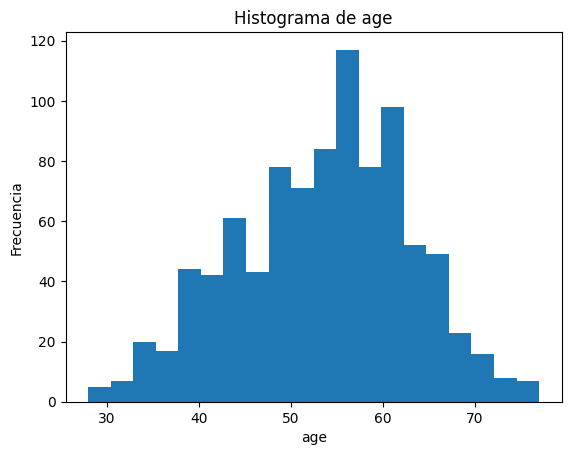

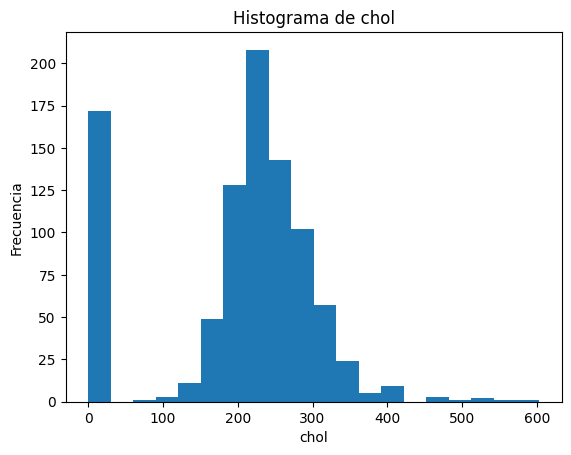

In [ ]:
# ============================================
# 9. HISTOGRAMAS (PUNTO 5)
# ============================================

for col in ["age", "chol"]:

    plt.figure()

    plt.hist(
        df[col].dropna(),
        bins=20
    )

    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

    plt.show()

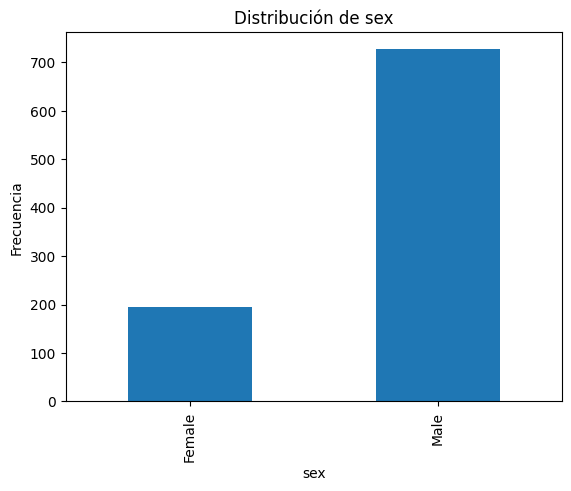

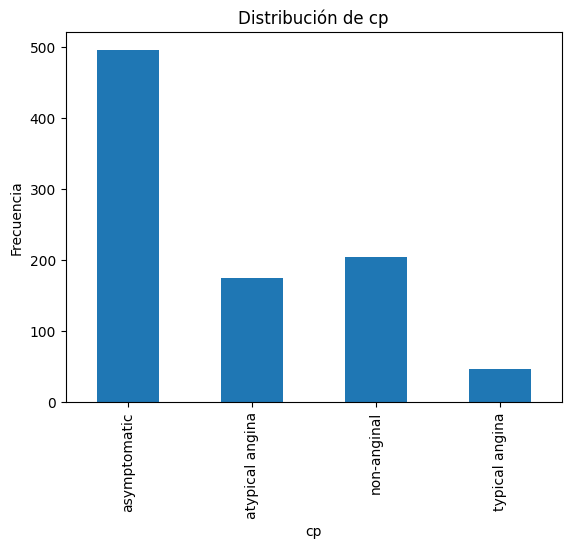

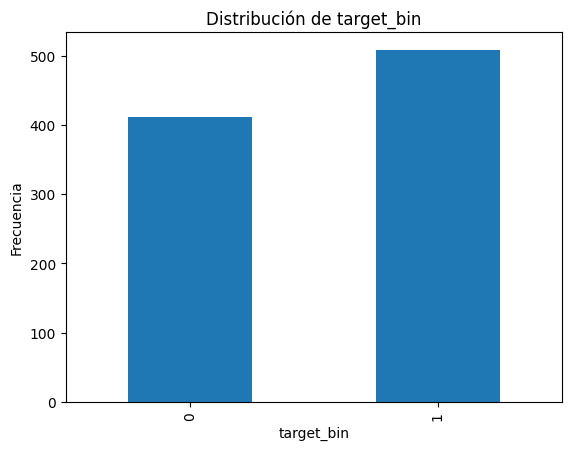

In [ ]:
# ============================================
# 10. GRÁFICOS DE BARRAS (PUNTO 5)
# ============================================

for col in ["sex", "cp", "target_bin"]:

    counts = df[col].value_counts().sort_index()

    plt.figure()

    counts.plot(kind="bar")

    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

    plt.show()

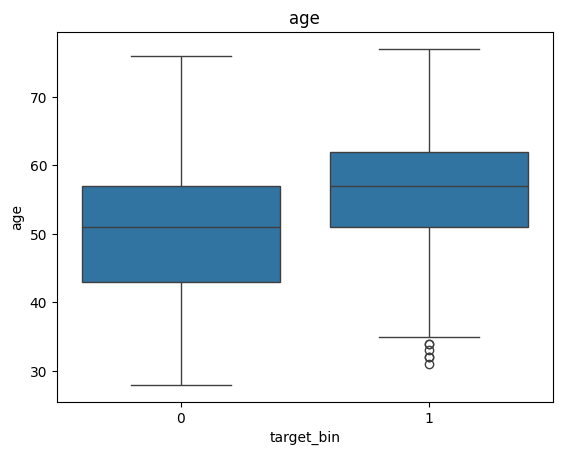

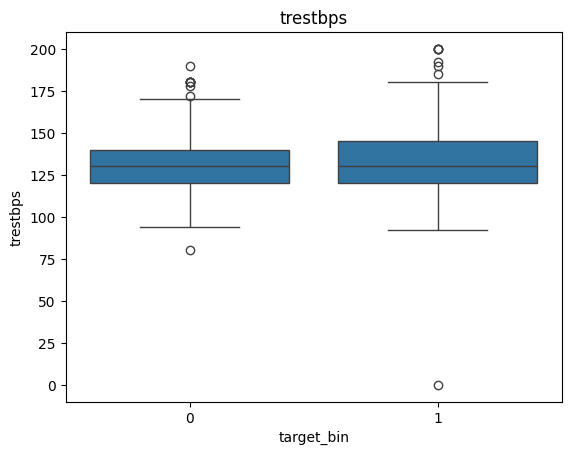

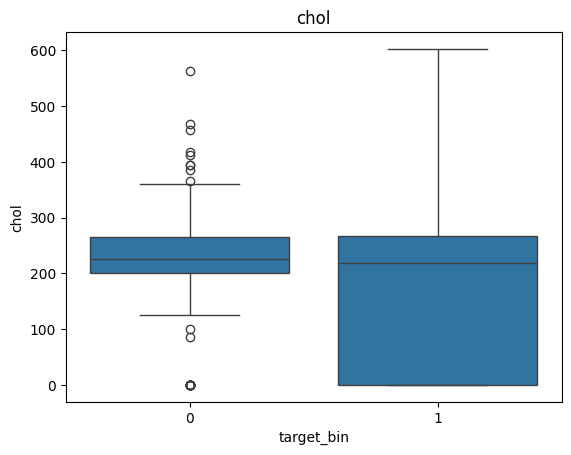

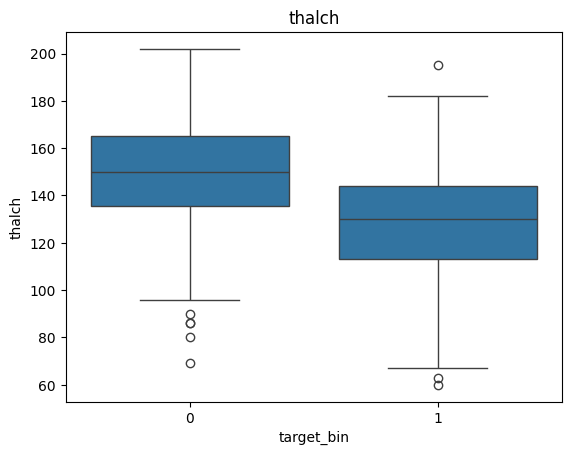

In [ ]:
# ============================================
# 11. BOXPLOT (PUNTO 5)
# ============================================


for col in ["age","trestbps","chol","thalch"]:
    sns.boxplot(x="target_bin", y=col, data=df)
    plt.title(col)
    plt.show()


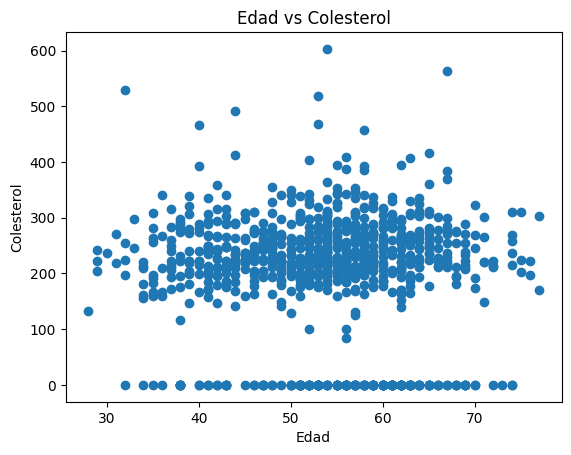


=== EDA FINALIZADO ===


In [ ]:
# ============================================
# 12. SCATTER PLOT (PUNTO 5)
# ============================================

plt.figure()

plt.scatter(
    df["age"],
    df["chol"]
)


plt.title("Edad vs Colesterol")
plt.xlabel("Edad")
plt.ylabel("Colesterol")

plt.show()


print("\n=== EDA FINALIZADO ===")